<a href="https://colab.research.google.com/github/lNamelessl/ML-Projects/blob/main/plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
# importing the dependencies
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
# loading the kaggle file
kaggle_credentials = json.load(open('kaggle.json'))

In [ ]:
# set up API key as env variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:40<00:00, 22.6MB/s]
100% 2.04G/2.04G [01:40<00:00, 21.8MB/s]


In [ ]:
# Unzip the downloaded dataset
with ZipFile("/content/plantvillage-dataset.zip", "r") as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])









['segmented', 'color', 'grayscale']
38
['Raspberry___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Soybean___healthy']
38
['Raspberry___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Soybean___healthy']
38
['Raspberry___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Soybean___healthy']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Apple___healthy")))
print(len(os.listdir("plantvillage dataset/segmented/Apple___healthy")))
print(len(os.listdir("plantvillage dataset/grayscale/Apple___healthy")))

1645
1645
1645


In [ ]:
# Dataset Path
base_dir = "plantvillage dataset/color"

(256, 256, 3)


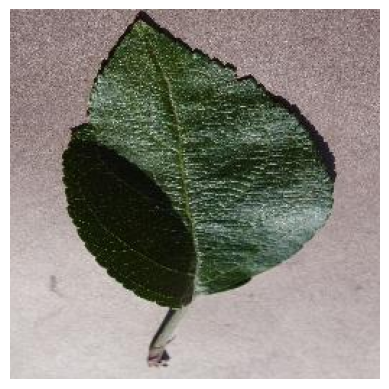

In [ ]:
image_path = "/content/plantvillage dataset/color/Apple___healthy/0055dd26-23a7-4415-ac61-e0b44ebfaf80___RS_HL 5672.JPG"

# read the image
img = mpimg.imread(image_path)
print(img.shape)
# display the image
plt.axis("off")
plt.imshow(img)
plt.show()

In [ ]:
# Image parameters
img_size = (224)
batch_size = 32

Train Test Split

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset="training"
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validate Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset="validation"
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network

In [ ]:
# Model definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='relu'))

In [ ]:
# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)              

In [ ]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
339/339 [==============================] - 42s 123ms/step - loss: nan - accuracy: 0.0116 - val_loss: nan - val_accuracy: 0.0116
Epoch 2/10
339/339 [==============================] - 41s 120ms/step - loss: nan - accuracy: 0.0116 - val_loss: nan - val_accuracy: 0.0116
Epoch 3/10
339/339 [==============================] - 40s 119ms/step - loss: nan - accuracy: 0.0116 - val_loss: nan - val_accuracy: 0.0116
Epoch 4/10
339/339 [==============================] - 42s 125ms/step - loss: nan - accuracy: 0.0116 - val_loss: nan - val_accuracy: 0.0116
Epoch 5/10
339/339 [==============================] - 43s 126ms/step - loss: nan - accuracy: 0.0116 - val_loss: nan - val_accuracy: 0.0116


In [ ]:
# model evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"validation accuracy = {val_accuracy * 100:.2f}%")
print(f"validation loss = {val_loss * 100:.2f}%")

Evaluating model...
340/340 [==============================] - 20s 58ms/step - loss: nan - accuracy: 0.0116
validation accuracy = 1.16%
validation loss = nan%


In [ ]:
# plot training and vaidation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# plot training and vaidation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# compare and improve accuracy